In [1]:
import numpy as np
from typing import Callable, List
def func (x):
    return 4*pow((x[0]-5),2)+pow((x[1]-6),2)

def best_samples(func: Callable[[np.array], float], x0, M: int, N: int,  t, R, b):
    x = x0
    k = 0
    while k < N:
        y_ = []
        f = []
        print("\nИтерация: {}".format(k))
        for _ in range(M):
            e = np.random.uniform(-1, 1, len(x))
            y = x + t * e / np.linalg.norm(e)
            y_.append(y)
            f.append(func(y))
        print("\nЗначение координат случайных векторов: {}".format(f))
        
        min_index = np.argmin(f)
        f_min = f[min_index]
        print("Минимальное значение Y: {}".format(f_min))

        if f_min < func(x):
            print("\n{} < {}".format(f_min,func(x)))
            x = y_[min_index]
            k += 1
            print("ШАГ УДАЧЕН!\nПереопределяем X: {}".format(x))
        else:
            print("\nПроверяем условия окончания расчета\n{} > {}".format(f_min,func(x)))
            if t <= R:
                print("{} <= {}".format(t,R))
                print("\n-----------Окончание расчета--------")
                return x
            elif t > R:
                print("\n{} > {}".format(t,R))
                t *= b
                print("Меняем величину шага в соотвествии с коэффициентом сжатия: {}".format(t))
    
    return x
x1,x2 = best_samples(func,[8,9],20,100,1,0.00001,0.1)
x_ = [x1,x2]
print("\nХ1 = {};\nX2 = {}\nY = {}".format(x1,x2,func(x_)))


Итерация: 0

Значение координат случайных векторов: [49.41897845766309, 54.45470377224892, 28.184022358596906, 32.703614881731106, 39.96593575901124, 73.37523604912167, 51.30296848962509, 29.672617459055054, 72.30311643277787, 30.27764425423645, 66.0952109042561, 33.67164632889188, 38.687556116650796, 54.60775188228652, 57.150765816089105, 58.163210027639536, 38.060436829546404, 51.80287825368683, 67.38617316041537, 73.09801341277105]
Минимальное значение Y: 28.184022358596906

28.184022358596906 < 45
ШАГ УДАЧЕН!
Переопределяем X: [7.06132704 9.34480876]

Итерация: 1

Значение координат случайных векторов: [14.998804255607524, 24.32311159204469, 15.628162864313499, 49.62839370663096, 29.654229165712913, 24.125854026446703, 46.989041623933765, 32.698742824152696, 14.166130298079516, 14.126304754881524, 16.697821489572462, 42.54042439215701, 16.666415542094544, 22.760089146864136, 16.22628345723706, 18.409286734847402, 15.22773310119942, 20.508593850781807, 17.378052835672577, 20.844558

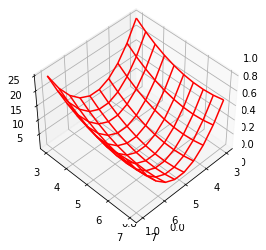

In [12]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')


# x and y values 
x = np.linspace(3, 7, 10) 
y = np.linspace(3, 7, 10) 
  
X = np.meshgrid(x, y) 
Z = func(X) 
  
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X[0], X[1], Z, color ='red') 
ax.view_init(45, 45)
plt.show()

In [3]:
ax.view_init(45, 60)
plt.show()